In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
    --------------------------------------- 0.3/12.7 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.7 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/12.7 MB 2.1 MB/s eta 0:00:06
   ---- ----------------------------------- 1.6/12.7 MB 2.2 MB/s eta 0:00:06
   ------- -------------------------------- 2.4/12.7 MB 2.4 MB/s eta 0:00:05
   --------- ------------------------------ 3.1/12.7 MB 2.8 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.7 MB 2.9 MB/s eta 0:00:04
   ------------- -------------------------- 4.5/12.7 MB 2.8 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.7 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 5.8/12.7 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 6.0/12.7 MB 2.7 MB/s eta 0:00:03
   ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np

In [10]:
import pandas as pd

In [11]:
np.random.seed(42)

In [16]:
apartments=[f"Apt_{i}"for i in range (1,21)]

In [17]:
apartments

['Apt_1',
 'Apt_2',
 'Apt_3',
 'Apt_4',
 'Apt_5',
 'Apt_6',
 'Apt_7',
 'Apt_8',
 'Apt_9',
 'Apt_10',
 'Apt_11',
 'Apt_12',
 'Apt_13',
 'Apt_14',
 'Apt_15',
 'Apt_16',
 'Apt_17',
 'Apt_18',
 'Apt_19',
 'Apt_20']

In [13]:
dates=pd.date_range(start="2025-07-01", periods=30,freq="D")

In [18]:
dates

DatetimeIndex(['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-04',
               '2025-07-05', '2025-07-06', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-12',
               '2025-07-13', '2025-07-14', '2025-07-15', '2025-07-16',
               '2025-07-17', '2025-07-18', '2025-07-19', '2025-07-20',
               '2025-07-21', '2025-07-22', '2025-07-23', '2025-07-24',
               '2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30'],
              dtype='datetime64[ns]', freq='D')

In [15]:
data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}
                                                                            

In [19]:
data

{'Date': array(['2025-07-01T00:00:00.000000000', '2025-07-02T00:00:00.000000000',
        '2025-07-03T00:00:00.000000000', '2025-07-04T00:00:00.000000000',
        '2025-07-05T00:00:00.000000000', '2025-07-06T00:00:00.000000000',
        '2025-07-07T00:00:00.000000000', '2025-07-08T00:00:00.000000000',
        '2025-07-09T00:00:00.000000000', '2025-07-10T00:00:00.000000000',
        '2025-07-11T00:00:00.000000000', '2025-07-12T00:00:00.000000000',
        '2025-07-13T00:00:00.000000000', '2025-07-14T00:00:00.000000000',
        '2025-07-15T00:00:00.000000000', '2025-07-16T00:00:00.000000000',
        '2025-07-17T00:00:00.000000000', '2025-07-18T00:00:00.000000000',
        '2025-07-19T00:00:00.000000000', '2025-07-20T00:00:00.000000000',
        '2025-07-21T00:00:00.000000000', '2025-07-22T00:00:00.000000000',
        '2025-07-23T00:00:00.000000000', '2025-07-24T00:00:00.000000000',
        '2025-07-25T00:00:00.000000000', '2025-07-26T00:00:00.000000000',
        '2025-07-27T00:00:00.0

In [20]:
df=pd.DataFrame(data)

In [21]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [22]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [23]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932500
min    2025-07-01 00:00:00           3.790000
25%    2025-07-08 00:00:00          16.530000
50%    2025-07-15 12:00:00          20.040000
75%    2025-07-23 00:00:00          23.112500
max    2025-07-30 00:00:00          39.260000
std                    NaN           4.861071


In [24]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [25]:
#Total usage per apartments
usage_per_apartment= df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)


In [26]:
usage_per_apartment

Apartment
Apt_11    642.31
Apt_6     641.82
Apt_13    634.22
Apt_10    616.09
Apt_20    613.14
Apt_7     609.87
Apt_8     607.18
Apt_16    606.97
Apt_14    604.33
Apt_3     601.93
Apt_4     596.99
Apt_15    591.38
Apt_19    586.61
Apt_5     585.76
Apt_2     581.81
Apt_9     578.48
Apt_1     571.80
Apt_17    570.33
Apt_12    568.99
Apt_18    549.49
Name: Electricity_usage, dtype: float64

In [27]:
daily_avg= df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    21.0440
2025-07-02    20.8695
2025-07-03    19.5685
2025-07-04    20.9855
2025-07-05    19.7835
Name: Electricity_usage, dtype: float64


In [32]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.0 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.1 MB 2.9 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 3.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 3.8 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 4.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 4.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------- -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [34]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

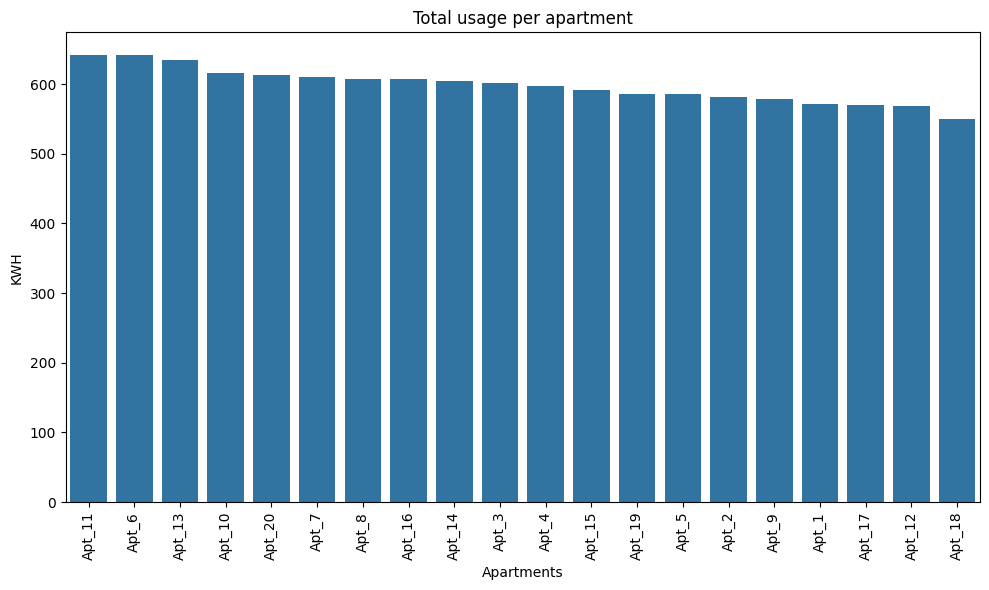

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per apartment")
plt.xlabel("Apartments")
plt.ylabel("KWH")
plt.tight_layout()
plt.show()

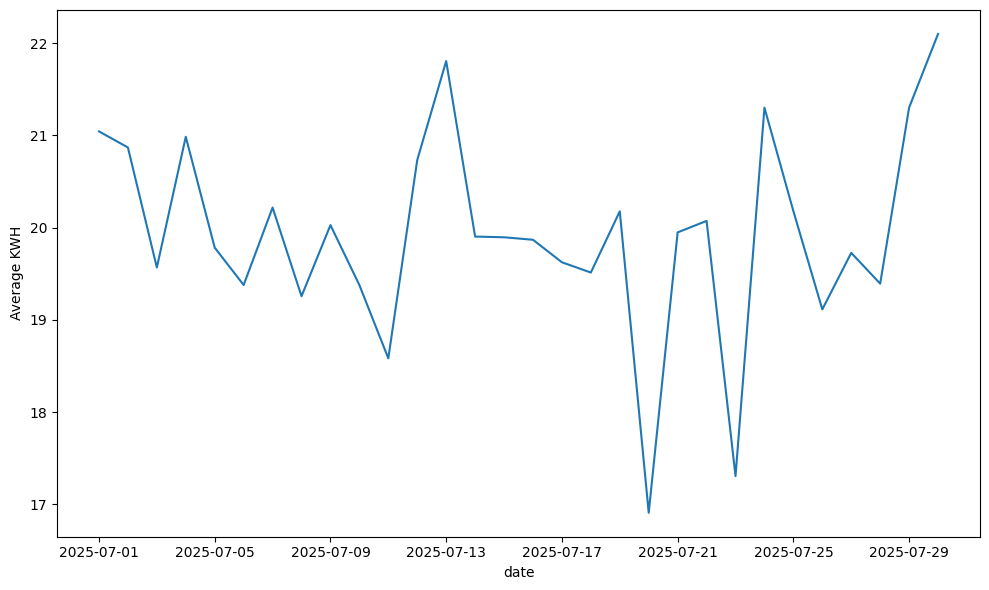

In [37]:
#Time series plot of daily average
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.xlabel("date")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

In [40]:
threshold = df["Electricity_usage"].mean()+2*df["Electricity_usage"].std()
df["High_usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_usage_flag
113 2025-07-24     Apt_4              32.32             True
125 2025-07-06     Apt_5              30.95             True
179 2025-07-30     Apt_6              33.60             True
209 2025-07-30     Apt_7              39.26             True
220 2025-07-11     Apt_8              31.57             True
